1
[{'compound': 0.0, 'headline': 'Transaction question ', 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}]
Positive headlines:

[]

Negative headlines:

[]
label
0    1
Name: count, dtype: int64
label
0    100.0
Name: proportion, dtype: float64


/var/folders/sj/v42yqwx56f98yr0c1m81jm5r0000gn/T/ipykernel_1662/3859642721.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])


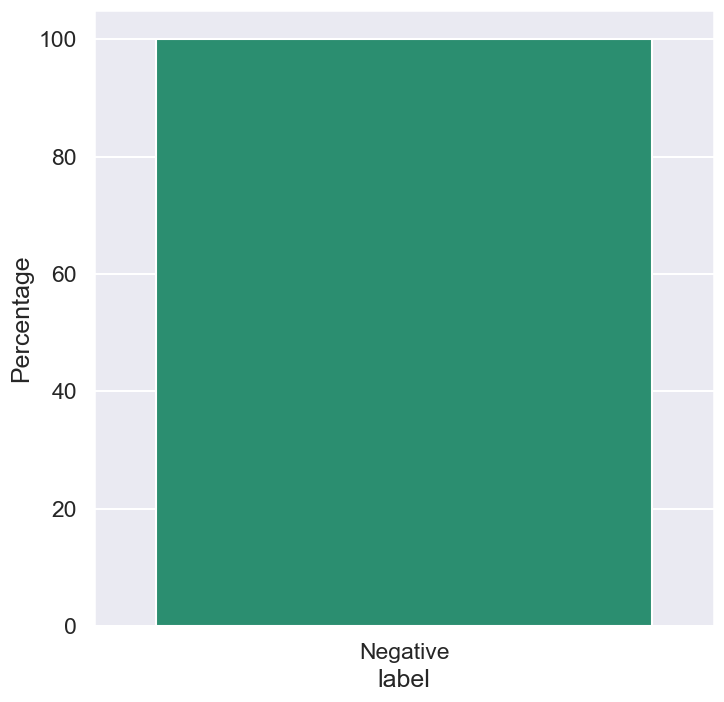

['This', 'is', 'an', 'example', 'sentence', '!', 'However', ',', 'it', 'is', "n't", 'a', 'very', 'informative', 'one']
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


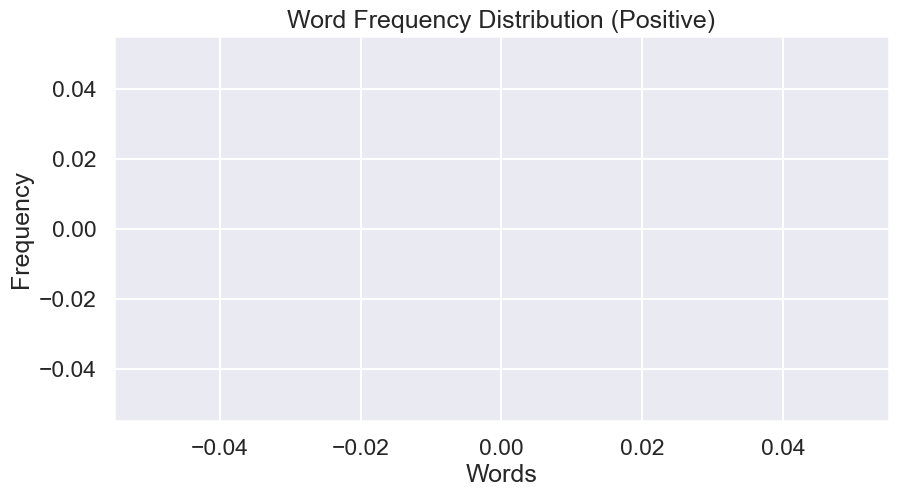

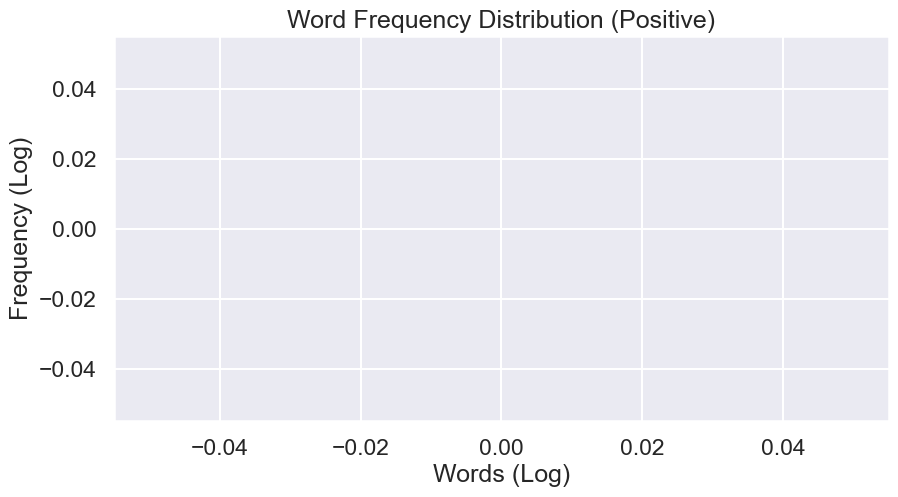

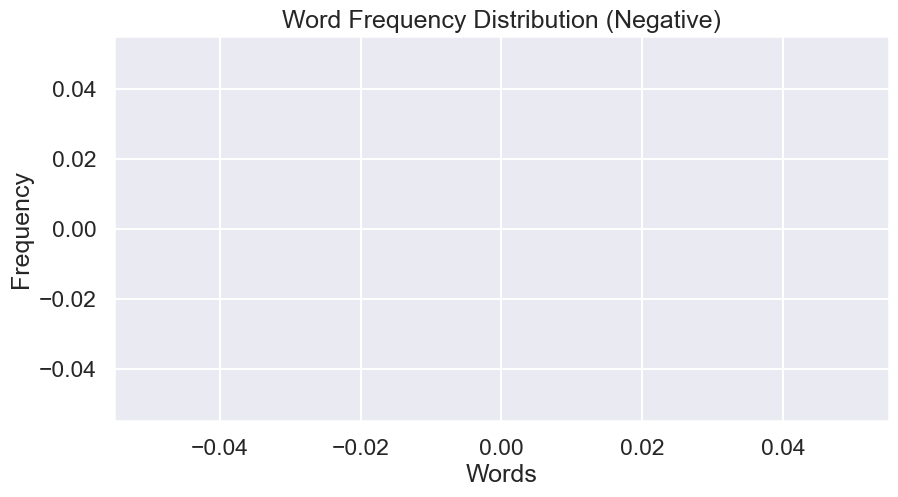

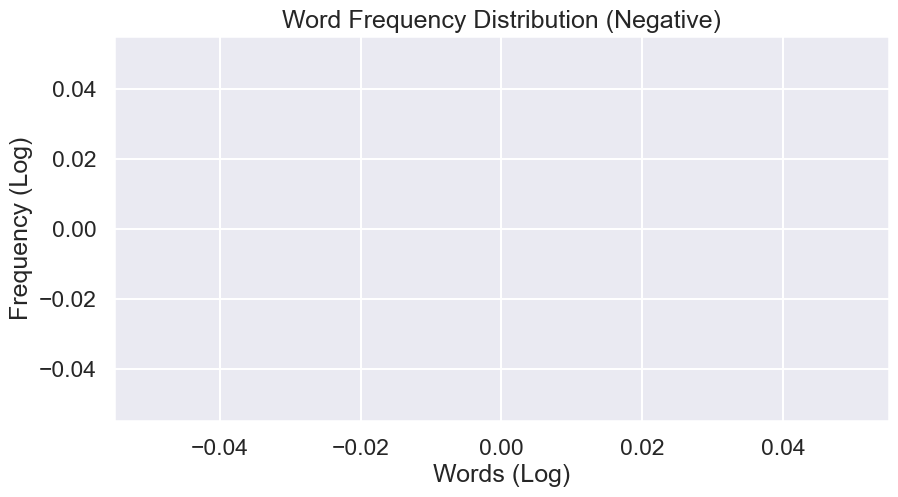

Position object does not have unrealized_pl attribute.
Panther is Waiting for the next trade signal...
Position object does not have unrealized_pl attribute.
Panther is Waiting for the next trade signal...


KeyboardInterrupt: 

In [2]:

import time
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
import praw

reddit = praw.Reddit(client_id='x-1J1-e5pU06I9-VC59TbQ',
                     client_secret='xFknVoOEaYtkYtreKlxSxB8YnV6e4Q',
                     user_agent='Swipesmeech')
headlines = set()

for submission in reddit.subreddit('Bitcoin').new(limit=1):
    headlines.add(submission.title)
    display.clear_output()
    print(len(headlines))



from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()

results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:], width=100)
df = pd.DataFrame.from_records(results)
df.head()
df['label'] = 0
df.loc[df['compound'] > 1.2, 'label'] = 1
df.loc[df['compound'] < -0.0001, 'label'] = -1
df.head()
df2 = df[['headline', 'label']]
df2.to_csv('reddit_headlines_labels.csv', mode='a', encoding='utf-8', index=False)
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)
print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100)

fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()


from nltk.tokenize import word_tokenize, RegexpTokenizer

example = "This is an example sentence! However, it isn't a very informative one"

print(word_tokenize(example, language='english'))
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(example)
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words[:20])





def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
        
    return tokens
pos_lines = list(df2[df2.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

# Filter the positive frequency distribution to include only words with a score greater than 20
filtered_pos_freq = {word: freq for word, freq in pos_freq.items() if freq >= 1 }

# Display the filtered results
filtered_pos_freq

y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()
neg_lines = list(df2[df2.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

# Filter the frequency distribution to include only words with a score greater than 20
filtered_neg_freq = {word: freq for word, freq in neg_freq.items() if freq >= 1}

# Display the filtered results
filtered_neg_freq

y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()
from alpaca.data.historical import CryptoHistoricalDataClient

# No keys required for crypto data
client = CryptoHistoricalDataClient()
from alpaca.data.requests import CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame

# Creating request object
request_params = CryptoBarsRequest(
  symbol_or_symbols=["BTC/USD"],
  timeframe=TimeFrame.Day,
  start="2024-05-19",
  end="2024-06-05"
)
# Retrieve daily bars for Bitcoin in a DataFrame and printing it
btc_bars = client.get_crypto_bars(request_params)

# Convert to dataframe
btc_bars.df

from alpaca.data.historical import CryptoHistoricalDataClient
from alpaca.data.requests import CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame
from alpaca_trade_api import REST

# Initialize Alpaca API
api = REST('PKBSC4CPI3AFYSAPWFMZ', 'FO0zcXpx3ur5CwKCamgIXwqvrehfjd3aqfVTt5tB', base_url='https://paper-api.alpaca.markets')

# No keys required for crypto data
client = CryptoHistoricalDataClient()

# Creating request object
request_params = CryptoBarsRequest(
    symbol_or_symbols=["BTC/USD"],
    timeframe=TimeFrame.Day,
    start="2024-05-19",
    end="2024-06-05"
)

# Retrieve daily bars for Bitcoin in a DataFrame and printing it
btc_bars = client.get_crypto_bars(request_params)

# Convert to dataframe
price_data = btc_bars.df

# Function to find supply and demand zones
def find_supply_demand_zones(price_data):
    start_price = price_data.iloc[0]['open']
    end_price = price_data.iloc[-1]['close']

    # Defining demand zone at the start date bar (lower price range)
    demand_zone = (start_price - 100, start_price)  # Assuming a demand zone 100 below the start price to start price

    # Defining supply zone at the end date candle (higher price range)
    supply_zone = (end_price, end_price + 100)  # Assuming a supply zone from end price to 100 above the end price

    return [supply_zone], [demand_zone]  # Returning as lists for consistency with the previous structure





# Function to calculate current profit/loss of an open position
def calculate_position_pnl(position):
    if position:
        if hasattr(position, 'unrealized_pl'):
            return float(position.unrealized_pl)  # Convert unrealized_pl to float
        else:
            print("Position object does not have unrealized_pl attribute.")
            return 0.0
    else:
        return 0.0





#def check_account_position(symbol):
    #position = api.get_position(symbol)
    #if position:
        #print(f"Panther is already in a position.")
        #pnl = calculate_position_pnl(position)
        #return pnl
    #else:
         #print(f"Panther is not currently in a position.")
        


    #return position






# Function to place limit orders above and below supply and demand zones
def trade_based_on_sentiment_and_supply_zone(supply_zones, demand_zones, filtered_pos_freq, filtered_neg_freq):
    symbol = 'BTCUSD'
    position = (symbol)
    
    pnl = calculate_position_pnl(position)
    return pnl
    
        
        # Check if profit threshold reached
    if pnl >= 2000:
            api.close_position(symbol=symbol)
            print(f"Position for {symbol} closed due to reaching $2000 profit threshold.")
        # Check if loss threshold reached
    elif pnl <= -500:
            api.close_position(symbol=symbol)
            print(f"Position for {symbol} closed due to reaching $1000 loss threshold.")
    else:
            print(f"Current unrealized P&L for {symbol}: ${pnl}")
    
    for zone in supply_zones:
                                upper_limit_price = zone[1] + 100  # Set limit order 100 above the upper bound of supply zone
    if filtered_neg_freq > filtered_pos_freq:  # Check sentiment
            api.submit_order(
                symbol='BTCUSD',
                qty=1,  
                side='sell',
                type='limit',
                limit_price=str(upper_limit_price),  # Convert to string
                time_in_force='gtc'
            )
            print("Sell limit order placed above supply zone PANTHER BOT IS WORKING !!.")
    else:
            print("Sentiment is not negative. No sell limit order placed above supply zone.")
    
    for zone in demand_zones:
        lower_limit_price = zone[0] - 100  # Set limit order 100 below the lower bound of demand zone
        if filtered_pos_freq > filtered_neg_freq:  # Check sentiment
            api.submit_order(
                symbol='BTCUSD',
                qty=1,  
                side='buy',
                type='limit',
                limit_price=str(lower_limit_price),  # Convert to string
                time_in_force='gtc'
            )
            print("Buy limit order placed below demand zone PANTHER BOT IS WORKING !!.")
        else:
            print("Sentiment is NOT positive. No buy limit order placed below demand zone.")

# Example usage
# Assuming you have sentiment data (positive or negative)
while True:
    filtered_pos_freq = len(df[df['label'] == 1])
    filtered_neg_freq = len(df[df['label'] == -1])

    supply_zones, demand_zones = find_supply_demand_zones(price_data)

    trade_based_on_sentiment_and_supply_zone(supply_zones, demand_zones, filtered_pos_freq, filtered_neg_freq)
    print("Panther is Waiting for the next trade signal...")
    time.sleep(10)

In [ ]:
# Alpaca API Credentials
#APCA_API_KEY = 'PKBSC4CPI3AFYSAPWFMZ'
#APCA_SECRET_KEY = 'FO0zcXpx3ur5CwKCamgIXwqvrehfjd3aqfVTt5tB'
#trading_client = TradingClient(APCA_API_KEY, APCA_SECRET_KEY, paper=True)
#crypto_stream = CryptoDataStream(APCA_API_KEY, APCA_SECRET_KEY, raw_data=True)

# Twitter API Credentials
#consumer_key = 'qqFHBnc0Dw6e43ZLfq1RLRczJ'
#consumer_secret = 'XJ0gTrD3LSi9dNXfmXHF6JVTbMrCh2aDM6UQo5VuwOt2k3q44s'
#access_token = '1649898005238108161-9hsIUTdC4k572wekuLoAuQeGeB9ni7'
#access_token_secret = 'KHTYJGPar4yHuaww67hW9mZRl8nCRz0z3kvUIPqTrNko0'


Fetched 9 headlines from Reddit
Positive headlines:

['Withdraw from Crypto.com App (Fiat to gbp) Help']

Negative headlines:

['Anyone else feel like a financial crisis is about to trigger a global recession?',
 'CLIPS This Week: Saylor Pro Ossify, De-Banked in the UK, A Yellen Theft, Broken Money, Green Mining & More',
 'Deception? ']
label
 0    5
-1    3
 1    1
Name: count, dtype: int64
label
 0    55.555556
-1    33.333333
 1    11.111111
Name: proportion, dtype: float64


/var/folders/sj/v42yqwx56f98yr0c1m81jm5r0000gn/T/ipykernel_75418/2291688720.py:212: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])


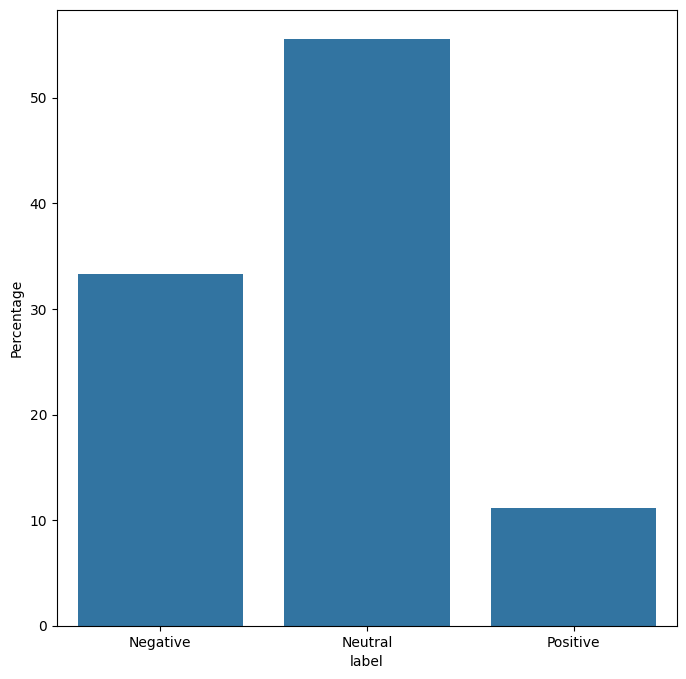

In [34]:
from IPython.display import clear_output
import praw
import time
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from alpaca.data.historical import CryptoHistoricalDataClient
from alpaca.data.requests import CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame
from alpaca_trade_api import REST
import requests

# Initialize Alpaca API
api = REST('PK336DOHK8MWV6PO4I2U', 'PJsoZKvA9ZIqotgGDeOpE7DoiwT4MsU1L2FSZo3g', base_url='https://paper-api.alpaca.markets')

# Initialize Reddit API
reddit = praw.Reddit(client_id='x-1J1-e5pU06I9-VC59TbQ',
                     client_secret='xFknVoOEaYtkYtreKlxSxB8YnV6e4Q',
                     user_agent='Swipesmeech')

# Initialize VADER sentiment analyzer
sia = SIA()

# Set up NLTK tokenizer and stopwords
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

# Function to fetch headlines from Reddit and perform sentiment analysis
def fetch_reddit_headlines(subreddits, limit):
    headlines = set()
    for subreddit_name in subreddits:
        subreddit = reddit.subreddit(subreddit_name)
        for submission in subreddit.new(limit=limit):
            headlines.add(submission.title)
            display.clear_output()
            print(f"Fetched {len(headlines)} headlines from Reddit")
    return headlines

# Function to process text: tokenize, lowercase, and remove stopwords
def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    return tokens

# Function to perform sentiment analysis on headlines
def analyze_sentiment(headlines):
    results = []
    for line in headlines:
        pol_score = sia.polarity_scores(line)
        pol_score['headline'] = line
        results.append(pol_score)
    return pd.DataFrame.from_records(results)

# Function to filter headlines into positive and negative based on compound score
def categorize_headlines(df):
    df['label'] = 0
    df.loc[df['compound'] > 0.2, 'label'] = 1  # Positive sentiment
    df.loc[df['compound'] < -0.2, 'label'] = -1  # Negative sentiment
    return df[['headline', 'label']]

# Function to fetch historical crypto data
def fetch_crypto_data(symbol, start_date, end_date):
    client = CryptoHistoricalDataClient()
    request_params = CryptoBarsRequest(
        symbol_or_symbols=[symbol],
        timeframe=TimeFrame.Day,
        start=start_date,
        end=end_date
    )
    btc_bars = client.get_crypto_bars(request_params)
    return btc_bars.df

# Function to find supply and demand zones
def find_supply_demand_zones(price_data):
    start_price = price_data.iloc[0]['open']
    end_price = price_data.iloc[-1]['close']

    demand_zone = (start_price - 100, start_price)  # Demand zone below start price
    supply_zone = (end_price, end_price + 100)  # Supply zone above end price

    return [supply_zone], [demand_zone]

# Function to calculate current profit/loss of an open position
def calculate_position_pnl(symbol):
    # API endpoint and headers
    url = f"https://paper-api.alpaca.markets/v2/positions/{symbol}"
    headers = {
        "accept": "application/json",
        "APCA-API-KEY-ID": "PK336DOHK8MWV6PO4I2U",
        "APCA-API-SECRET-KEY": "PJsoZKvA9ZIqotgGDeOpE7DoiwT4MsU1L2FSZo3g"
    }
    
    try:
        # Make GET request to retrieve position for the specific symbol
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Raise an exception for bad status codes
        
        data = response.json()
        
        # Extract relevant data
        unrealized_pnl = float(data['unrealized_pl'])
        #current_price = float(data['current_price'])
        quantity = float(data['qty'])  # Use float instead of int for fractional shares
        
        # Calculate P&L
        pnl = unrealized_pnl
        print(f"{symbol}: {pnl}")
        
        return pnl
    
    except requests.exceptions.RequestException as e:
        print(f"Error retrieving position for {symbol}: {e}")
    except KeyError as e:
        print(f"Error processing data for {symbol}: {e}")
    except ValueError as e:
        print(f"Error converting values for {symbol}: {e}")
    
    # If any error occurs, return None
    return None
    
    # If symbol not found or other error, return None or handle accordingly
    return None

# Function to close position based on profit or loss thresholds
def close_position_if_needed(symbol, pnl):
    # Check if profit threshold reached
    if pnl >= 2500:
        api.close_position(symbol=symbol)
        print(f"Position for {symbol} closed due to reaching $2000 profit threshold.")

    # Check if loss threshold reached
    elif pnl <= -1000:
        api.close_position(symbol=symbol)
        print(f"Position for {symbol} closed due to reaching $720 loss threshold.")

# Function to execute trades based on sentiment and supply/demand zones
# Function to execute trades based on sentiment and supply/demand zones
def trade_based_on_sentiment_and_supply_zone(symbol, supply_zones, demand_zones, filtered_pos_freq, filtered_neg_freq, pnl):
    # Check if there is an open position
    if pnl is not None:
        # Close the existing position if pnl is outside acceptable thresholds
        close_position_if_needed(symbol, pnl)
        return  # Exit function to avoid opening new positions when one is already open

    # Check sentiment and place orders
    for zone in supply_zones:
        upper_limit_price = zone[1] + 100
        if filtered_neg_freq > filtered_pos_freq:
            api.submit_order(
                symbol=symbol,
                qty=2,
                side='sell',
                type='limit',
                limit_price=str(upper_limit_price),
                time_in_force='gtc'
            )
            print("Sell limit order placed above supply zone.")
            return  # Exit function after placing order

    for zone in demand_zones:
        lower_limit_price = zone[0] - 100
        if filtered_pos_freq > filtered_neg_freq:
            api.submit_order(
                symbol=symbol,
                qty=2,
                side='buy',
                type='limit',
                limit_price=str(lower_limit_price),
                time_in_force='gtc'
            )
            print("Buy limit order placed below demand zone.")
            return  # Exit function after placing order

    print("No valid trading signal found.")


# Main trading strategy loop
while True:
    # Fetch headlines from Reddit
    subreddits = ['Bitcoin', 'btc', 'CryptoCurrency']  # Example list of subreddit names
    headlines = fetch_reddit_headlines(subreddits, limit=3)

    # Perform sentiment analysis
    df = analyze_sentiment(headlines)

    # Categorize headlines into positive and negative
    df2 = categorize_headlines(df)

    # Display sentiment statistics
    print("Positive headlines:\n")
    pprint(list(df[df['label'] == 1].headline)[:5], width=200)
    print("\nNegative headlines:\n")
    pprint(list(df[df['label'] == -1].headline)[:5], width=200)
    print(df.label.value_counts())
    print(df.label.value_counts(normalize=True) * 100)

    # Plot sentiment distribution
    fig, ax = plt.subplots(figsize=(8, 8))
    counts = df.label.value_counts(normalize=True) * 100
    sns.barplot(x=counts.index, y=counts, ax=ax)
    ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
    ax.set_ylabel("Percentage")
    plt.show()

    # Process positive and negative tokens
    pos_lines = list(df2[df2.label == 1].headline)
    pos_tokens = process_text(pos_lines)
    pos_freq = nltk.FreqDist(pos_tokens)
    filtered_pos_freq = {word: freq for word, freq in pos_freq.items() if freq >= 1}

    neg_lines = list(df2[df2.label == -1].headline)
    neg_tokens = process_text(neg_lines)
    neg_freq = nltk.FreqDist(neg_tokens)
    filtered_neg_freq = {word: freq for word, freq in neg_freq.items() if freq >= 1}

    # Plot word frequency distribution (positive)
    y_val = [x[1] for x in pos_freq.most_common()]
    fig = plt.figure(figsize=(10, 5))
    plt.plot(y_val)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title("Word Frequency Distribution (Positive)")
    plt.show()

    # Plot word frequency distribution (negative)
    y_val = [x[1] for x in neg_freq.most_common()]
    fig = plt.figure(figsize=(10, 5))
    plt.plot(y_val)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title("Word Frequency Distribution (Negative)")
    plt.show()

    # Fetch historical cryptocurrency data
    price_data = fetch_crypto_data("BTC/USD", "2024-05-19", "2024-06-05")

    # Find supply and demand zones
    supply_zones, demand_zones = find_supply_demand_zones(price_data)

    # Calculate current P&L for open position
    symbol = 'BTCUSD'  # Replace with the symbol you are trading
    pnl = calculate_position_pnl(symbol)

    # Execute trades based on sentiment and supply/demand zones
    trade_based_on_sentiment_and_supply_zone(symbol, supply_zones, demand_zones, len(pos_lines), len(neg_lines), pnl)
    

    print("Checking again in 10 seconds...")
    print(f"​🇵​​🇦​​🇳​​🇹​​🇭​​🇪​​🇷​ ​🇮​​🇸​ ​🇦​​🇱​​🇷​​🇪​​🇦​​🇩​​🇾​ ​🇮​​🇳​ ​🇦​ ​🇵​​🇴​​🇸​​🇮​​🇹​​🇮​​🇴​​🇳​. ")
    print(f"​🇸​​🇱​​🇪​​🇪​​🇵​​🇮​​🇳​​🇬​ ​🇫​​🇴​​🇷​ 5️⃣ ​🇸​​🇪​​🇨​​🇴​​🇳​​🇩​​🇸​...")
    print(f"./////////////ꪻ᥅ꪖᦔ꠸ꪀᧁ ꠸ᦓ ꪖᥴꪻ꠸ꪜꫀ/////")
    print(f".\\\\\\\\\\\\\ꪻ᥅ꪖᦔ꠸ꪀᧁ ꠸ᦓ ꪖᥴꪻ꠸ꪜꫀ\\\\")
    print(f"./////////////ꪻ᥅ꪖᦔ꠸ꪀᧁ ꠸ᦓ ꪖᥴꪻ꠸ꪜꫀ/////")
    print(f".\\\\\\\\\\\\\ꪻ᥅ꪖᦔ꠸ꪀᧁ ꠸ᦓ ꪖᥴꪻ꠸ꪜꫀ\\\\\\")
    print("🄿🄰🄽🅃🄷🄴🅁 🄿🄸🄿 🄰🅃 🅆🄾🅁🄺")
    print(f"./////////////ꪻ᥅ꪖᦔ꠸ꪀᧁ ꠸ᦓ ꪖᥴꪻ꠸ꪜꫀ//////")
    print(f".\\\\\\\\\\\\\ꪻ᥅ꪖᦔ꠸ꪀᧁ ꠸ᦓ ꪖᥴꪻ꠸ꪜꫀ\\\\\\")
    print(f"./////////////ꪻ᥅ꪖᦔ꠸ꪀᧁ ꠸ᦓ ꪖᥴꪻ꠸ꪜꫀ//////")
    print(f".\\\\\\\\\\\\\\ꪻ᥅ꪖᦔ꠸ꪀᧁ ꠸ᦓ ꪖᥴꪻ꠸ꪜꫀ\\\\")
    time.sleep(10)

    

